#Taller 2

##Instrucciones

1. Preparación del dataset

Utilicen el dataset escogido en la primera parte del laboratorio.
Realicen una copia del dataset original para mantener el respaldo.
2. Manejo de valores nulos

Exploren y revisen si existen valores nulos o faltantes en el dataset:
Si encuentran valores nulos, realicen la imputación adecuada (media, mediana, moda, o técnicas más avanzadas según el contexto del dato).
3. Identificación e imputación de valores atípicos

Identifiquen valores atípicos (outliers).
Utilicen una técnica sofisticada de imputación como KNN (K-Nearest Neighbors) o MICE (Multivariate Imputation by Chained Equations) para tratar estos valores atípicos.
Describan brevemente la eficacia de la técnica utilizada y generen un insight a partir de los resultados.
4. Transformación de variables categóricas a numéricas

Creen otro dataset basado en el actual, pero transformando todas las variables categóricas a variables numéricas:
Utilicen técnicas adecuadas como One-Hot Encoding, Label Encoding, o similares.
5. Análisis de correlación y generación de insights

Usando este nuevo dataset totalmente numérico, realicen nuevamente un análisis de correlación entre variables:
Generen una matriz de correlación.
Identifiquen al menos 3 insights nuevos derivados de esta transformación numérica.

##Importaciones

In [ ]:
#Importamos las librerías necesarias
import pandas as pd
import seaborn as sbn
import numpy as np
import matplotlib.pyplot as plt
from seaborn import load_dataset

In [ ]:
import requests as rq #Importamos 'request' para hacer una petición HTTP
!pip install openpyxl #permite al sistema interactuar con el archivo xlsx

# importamos el data set desde GitHub / Como es un archivo que necesitamos leer directamente desde Github, tenemos que cambiar 'blob' por 'raw'
url_dataset = 'https://github.com/Rektres/Dataset_DataMining_Obesity/raw/main/ObesityDataSet.csv'


# A traves de request, llamamos el dataset
response = rq.get(url_dataset)

#Abre un archivo en modo escritura binaria ('wb') y escribe el contenido descargado
open('Obesity_Gini.csv', 'wb').write(response.content) #Si el archivo no existe lo crea, si existe, lo sobrescribe

df_Obesity_Gini = pd.read_csv('Obesity_Gini.csv')

##Información del dataset

In [ ]:
#Comprobamos el tamaño del nuevo DataFrame
print(f"Tamaño del DataFrame en CSV: {df_Obesity_Gini.shape}")

# mostramos la información de las columnas del data set (tipo y cantidad de datos)
df_Obesity_Gini.info()

Tamaño del DataFrame en CSV: (2111, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 

Gender **(Cualitativa Nominal)**: Genero de cada individuo

Age **(Cuantitativa Continua)**: Edad de cada individuo (transformar a discreta)

Height **(Cuantitativa Continua)**: Altura de cada individuo

Weight **(Cuantitativa Continua)**: Peso de cada individuo

family_history_with_overweight **(Cualitativa Nominal)**: ¿Algún familiar ha
sufrido o sufre de sobrepeso? (yes/no)

FAVC **(Cualitativa Nominal)**: ¿Come frecuentemente alimentos con alto
contenido calórico? (yes/no)

FCVC **(Cuantitativa Continua)**: ¿Suele comer verduras en las comidas? (transformar a discreta)

NCP **(Cuantitativa Continua)**: ¿Cuántas comidas principales realiza
diariamente? (transformar a discreta)

CAEC **(Cualitativa Nominal)**: ¿Come algún alimento entre las comidas? (always frequently/no/sometimes)

SMOKE **(Cualitativa Nominal)**: ¿Fuma? (yes/no)

CH2O **(Cuantitativa Continua)**: ¿Cuánta agua bebe diariamente?

SCC **(Cualitativa Nominal)**: ¿Controla las calorías que consumes diariamente?
(yes/no)

FAF **(Cuantitativa Continua)**: ¿Con qué frecuencia realiza actividad física?

TUE **(Cuantitativa Continua)**: ¿Cuánto tiempo utiliza dispositivos
tecnológicos como celular, videojuegos, televisión, computadora y otros?

CALC **(Cualitativa Nominal)**: ¿Con qué frecuencia bebe alcohol? (always/
frequently/no/sometimes)

MTRANS **(Cualitativa Nominal)**: ¿Qué transporte utiliza habitualmente?

NObeyesdad **(Cualitativa Nominal)**: Nivel de obesidad


##Identificando Nulos

In [ ]:
# Definimos los tipos de nulos que utiliza numpy
na_values = ('np.nan', 'NA', 'NaN', 'nan','inf')

# Número total de filas en el DataFrame
total_filas = len(df_Obesity_Gini)

# Iteramos sobre cada columna
for columna in df_Obesity_Gini.columns:
    # Contamos la cantidad de nulos en cada columna
    conteo_nulos = df_Obesity_Gini[columna].isnull().sum()

    # Si la cantidad de nulos es mayor a 0, mostramos la cantidad de nulos por columna y su respectivo porcentaje
    if conteo_nulos > 0:
        porcentaje_nulos = (conteo_nulos/total_filas)*100
        print(f"La columna '{columna}' tiene {conteo_nulos} valores nulos ({porcentaje_nulos:.2f}%)")
    else:
        print(f"La columna '{columna}' no tiene valores nulos")

La columna 'Gender' no tiene valores nulos
La columna 'Age' no tiene valores nulos
La columna 'Height' no tiene valores nulos
La columna 'Weight' no tiene valores nulos
La columna 'family_history_with_overweight' no tiene valores nulos
La columna 'FAVC' no tiene valores nulos
La columna 'FCVC' no tiene valores nulos
La columna 'NCP' no tiene valores nulos
La columna 'CAEC' no tiene valores nulos
La columna 'SMOKE' no tiene valores nulos
La columna 'CH2O' no tiene valores nulos
La columna 'SCC' no tiene valores nulos
La columna 'FAF' no tiene valores nulos
La columna 'TUE' no tiene valores nulos
La columna 'CALC' no tiene valores nulos
La columna 'MTRANS' no tiene valores nulos
La columna 'NObeyesdad' no tiene valores nulos


##Identificando Outliers

In [ ]:
# Función para detectar outliers usando el método IQR
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

# Columnas numéricas del DataFrame
numeric_cols = df_Obesity_Gini.select_dtypes(include=np.number).columns

# Iterar sobre las columnas numéricas y detectar outliers
for col in numeric_cols:
    outliers = detect_outliers_iqr(df_Obesity_Gini[col])
    num_outliers = len(outliers)
    print(f"Columna '{col}': {num_outliers} outliers")


Columna 'Age': 168 outliers
Columna 'Height': 1 outliers
Columna 'Weight': 1 outliers
Columna 'FCVC': 0 outliers
Columna 'NCP': 579 outliers
Columna 'CH2O': 0 outliers
Columna 'FAF': 0 outliers
Columna 'TUE': 0 outliers


In [85]:
# Creamos una copia del DataFrame original para no modificar el original
df_Obesity_Gini_copia = df_Obesity_Gini.copy()

In [86]:
# !pip install fancyimpute

from fancyimpute import IterativeImputer

# Imputación de outliers usando MICE
# Seleccionar las columnas numéricas para la imputación MICE
cols_mice = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Crear un nuevo DataFrame solo con las columnas numéricas
df_mice = df_Obesity_Gini_copia[cols_mice].copy()

# Inicializar el imputador MICE
mice_imputer = IterativeImputer()

# Realizar la imputación MICE
df_mice_imputed = mice_imputer.fit_transform(df_mice)

# Convertir el resultado de nuevo a un DataFrame
df_mice_imputed = pd.DataFrame(df_mice_imputed, columns=cols_mice)

# Reemplazar las columnas originales en el DataFrame copia con las columnas imputadas
df_Obesity_Gini_copia[cols_mice] = df_mice_imputed

# Convertir las columnas de tipo float a int usando astype (después de MICE)
for col in cols_mice:
  if df_Obesity_Gini_copia[col].dtype == 'float64':
    df_Obesity_Gini_copia[col] = df_Obesity_Gini_copia[col].astype(int)
    print(f"La columna '{col}' ha sido convertida de float a int.")


La columna 'Age' ha sido convertida de float a int.
La columna 'Height' ha sido convertida de float a int.
La columna 'Weight' ha sido convertida de float a int.
La columna 'FCVC' ha sido convertida de float a int.
La columna 'NCP' ha sido convertida de float a int.
La columna 'CH2O' ha sido convertida de float a int.
La columna 'FAF' ha sido convertida de float a int.
La columna 'TUE' ha sido convertida de float a int.


In [87]:
# mostramos la información de las columnas del data set (tipo y cantidad de datos)
df_Obesity_Gini_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Gender                          2111 non-null   object
 1   Age                             2111 non-null   int64 
 2   Height                          2111 non-null   int64 
 3   Weight                          2111 non-null   int64 
 4   family_history_with_overweight  2111 non-null   object
 5   FAVC                            2111 non-null   object
 6   FCVC                            2111 non-null   int64 
 7   NCP                             2111 non-null   int64 
 8   CAEC                            2111 non-null   object
 9   SMOKE                           2111 non-null   object
 10  CH2O                            2111 non-null   int64 
 11  SCC                             2111 non-null   object
 12  FAF                             2111 non-null   

In [88]:
# Función para detectar outliers usando el método IQR
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

# Columnas numéricas del DataFrame
numeric_cols = df_Obesity_Gini_copia.select_dtypes(include=np.number).columns

# Iterar sobre las columnas numéricas y detectar outliers
for col in numeric_cols:
    outliers = detect_outliers_iqr(df_Obesity_Gini_copia[col])
    num_outliers = len(outliers)
    print(f"Columna '{col}': {num_outliers} outliers")


Columna 'Age': 147 outliers
Columna 'Height': 0 outliers
Columna 'Weight': 1 outliers
Columna 'FCVC': 0 outliers
Columna 'NCP': 0 outliers
Columna 'CH2O': 0 outliers
Columna 'FAF': 75 outliers
Columna 'TUE': 0 outliers


##Transformación de variables

Transformación de columnas Cualitativa Nominal con Label Encoded

In [89]:
from sklearn.preprocessing import LabelEncoder

# Lista de las columnas que quieres codificar
columnas_a_codificar = ['Gender', 'family_history_with_overweight', 'FAVC','SMOKE','SCC']  # Reemplaza con los nombres de las columnas que deseas codificar

# Inicializar el LabelEncoder
label_encoder = LabelEncoder()

# Aplicar Label Encoding a las columnas seleccionadas
for col in columnas_a_codificar:
    df_Obesity_Gini_copia[col] = label_encoder.fit_transform(df_Obesity_Gini_copia[col])

# Mostrar las primeras filas del DataFrame codificado
df_Obesity_Gini_copia.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21,1,64,1,0,2,3,Sometimes,0,2,0,0,1,no,Public_Transportation,Normal_Weight
1,0,21,1,56,1,0,3,3,Sometimes,1,3,1,3,0,Sometimes,Public_Transportation,Normal_Weight
2,1,23,1,77,1,0,2,3,Sometimes,0,2,0,2,1,Frequently,Public_Transportation,Normal_Weight
3,1,27,1,87,0,0,3,3,Sometimes,0,2,0,2,0,Frequently,Walking,Overweight_Level_I
4,1,22,1,89,0,0,2,1,Sometimes,0,2,0,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [90]:
# One-Hot Encoding para las columnas categóricas restantes
columnas_categ = ['CAEC', 'CALC', 'MTRANS', 'NObeyesdad']
df_Obesity_Gini_copia = pd.get_dummies(df_Obesity_Gini_copia, columns=columnas_categ, drop_first=True)

# Mostrar las primeras filas del DataFrame codificado
df_Obesity_Gini_copia.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,...,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II
0,0,21,1,64,1,0,2,3,0,2,...,False,False,True,False,True,False,False,False,False,False
1,0,21,1,56,1,0,3,3,1,3,...,False,False,True,False,True,False,False,False,False,False
2,1,23,1,77,1,0,2,3,0,2,...,False,False,True,False,True,False,False,False,False,False
3,1,27,1,87,0,0,3,3,0,2,...,False,False,False,True,False,False,False,False,True,False
4,1,22,1,89,0,0,2,1,0,2,...,False,False,True,False,False,False,False,False,False,True


##Matriz de Correlación

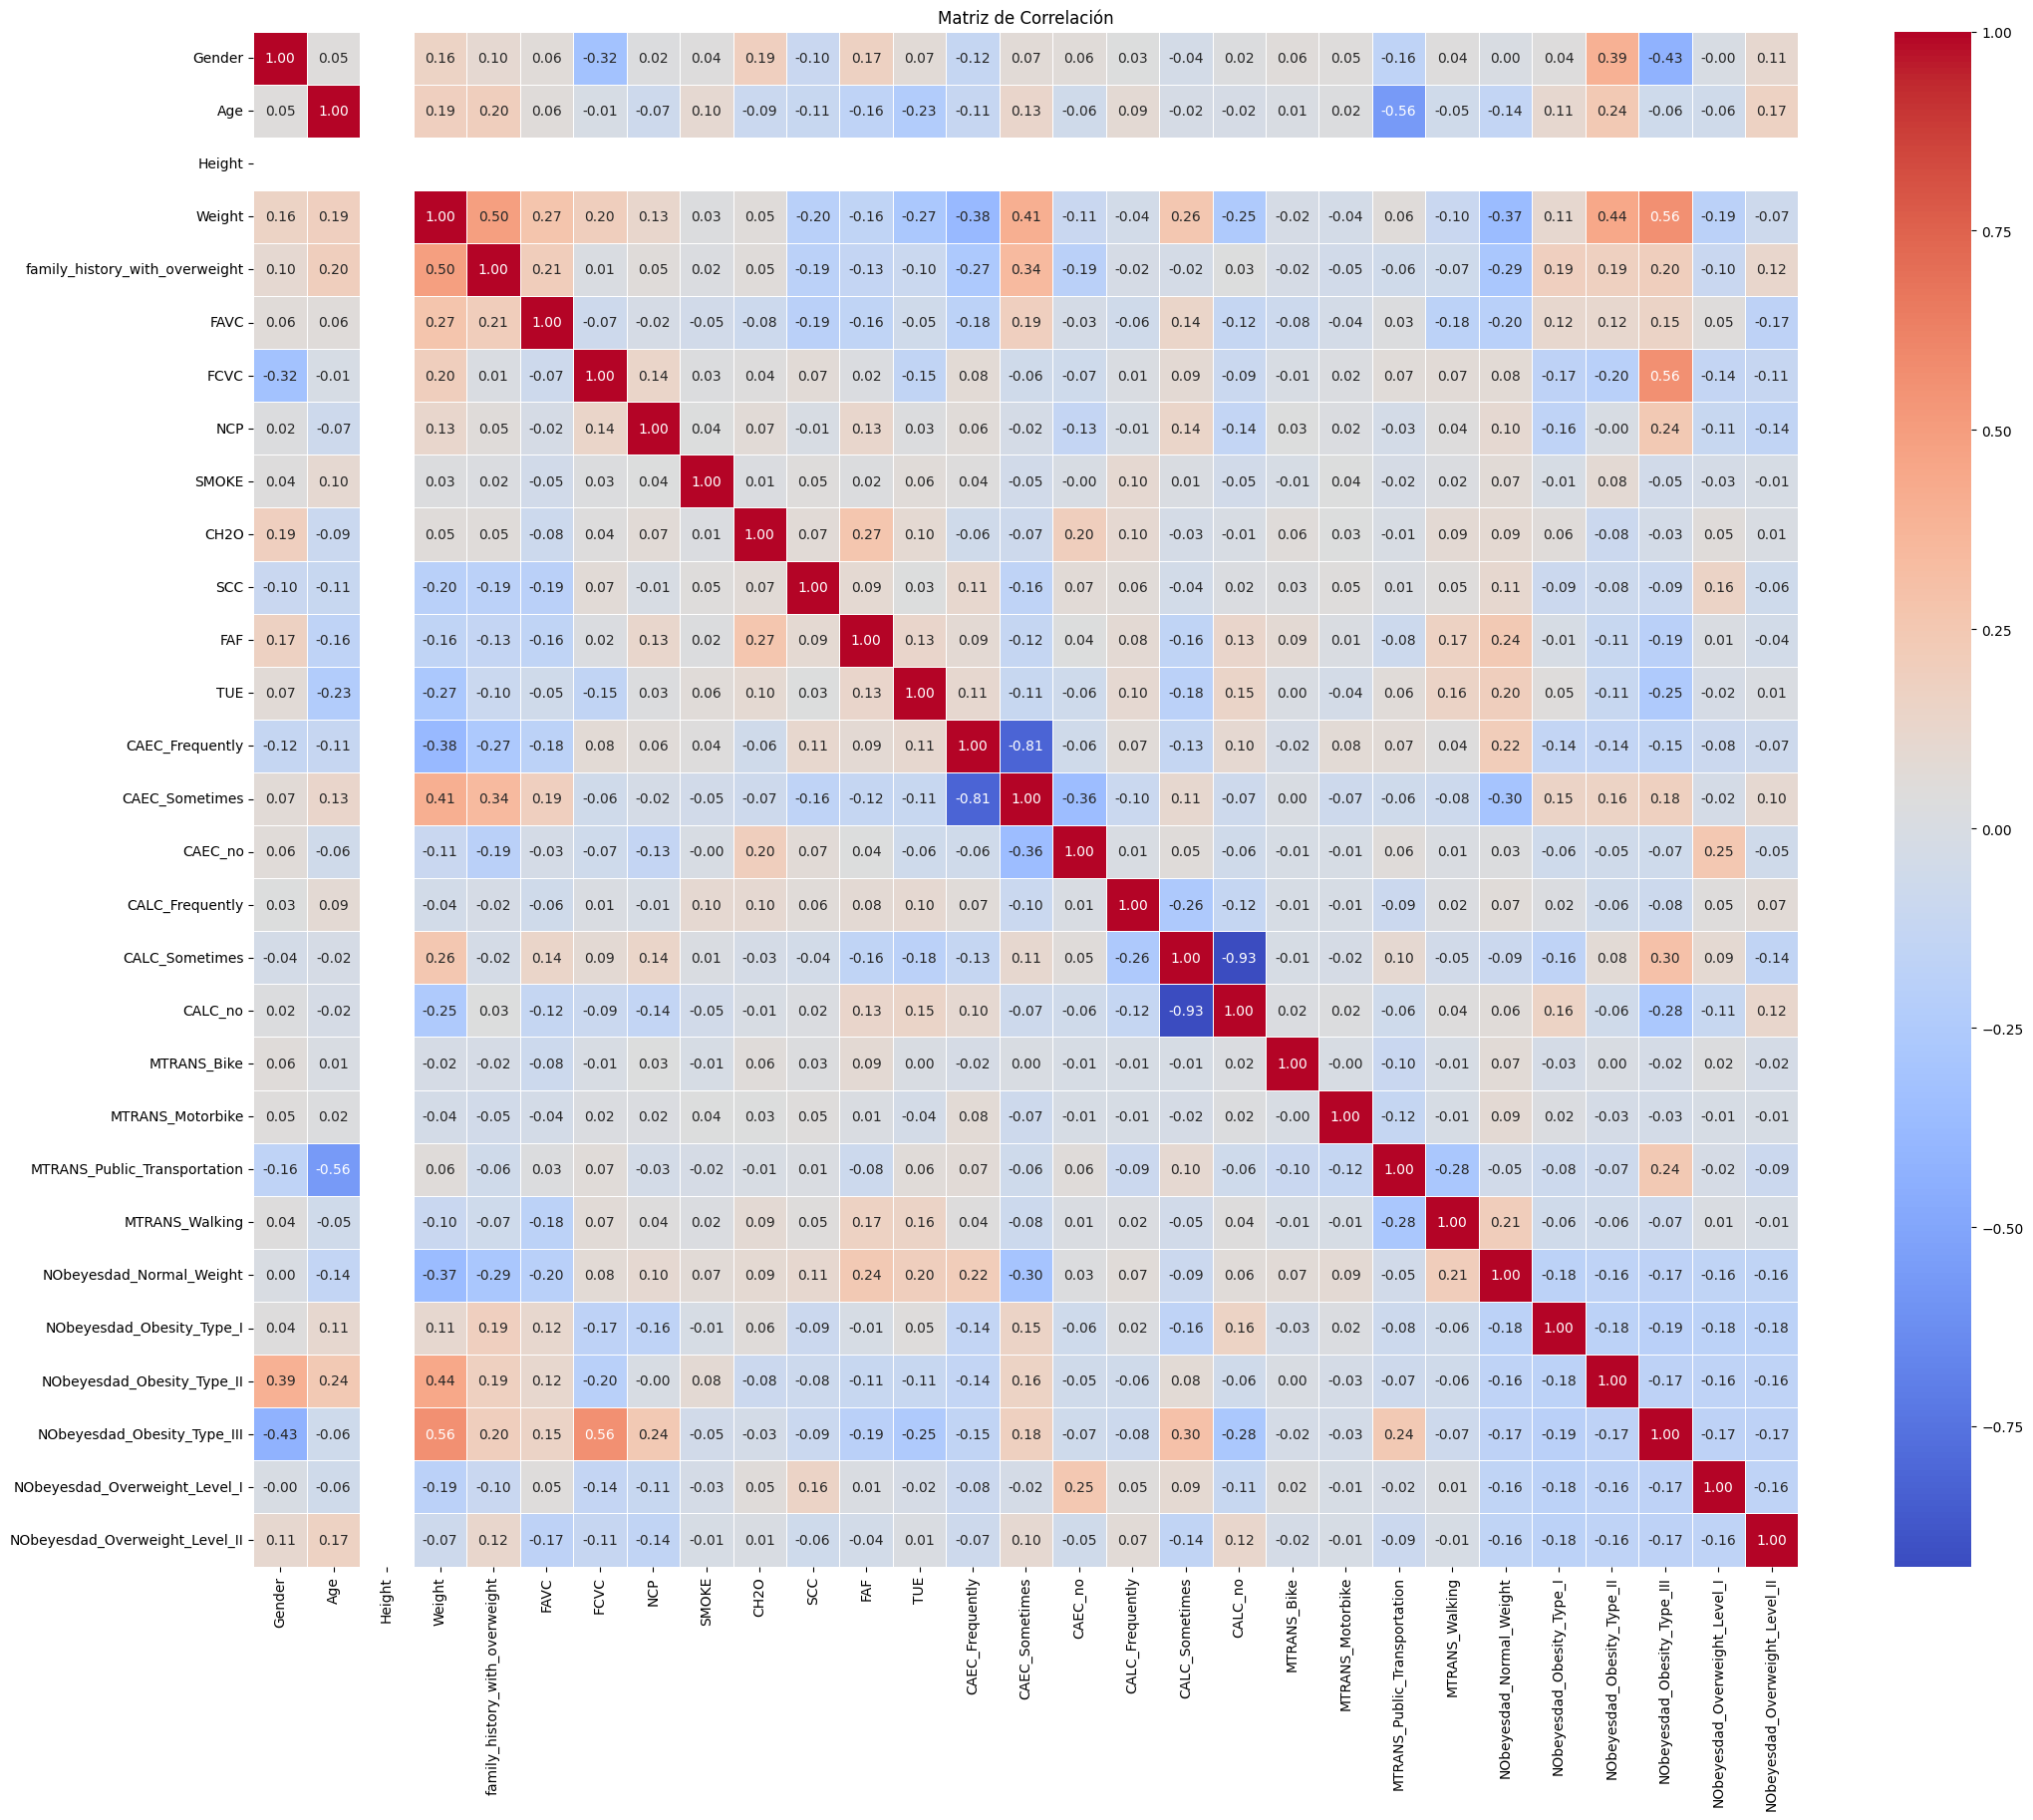

In [95]:
# Importar bibliotecas necesarias
import matplotlib.pyplot as plt
import seaborn as sbn

# Calcular la matriz de correlación
correlation_matrix = df_Obesity_Gini_copia.corr()

# Configurar el tamaño de la figura
plt.figure(figsize=(25, 20))

# Crear un heatmap para visualizar la matriz de correlación
sbn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Título para la visualización
plt.title('Matriz de Correlación')

# Mostrar la visualización
plt.show()


##Nuevos Insight

Comer fuera frecuentemente se relaciona con más obesidad

Interpretación: Comer en restaurantes frecuentemente puede llevar a consumir más calorías y alimentos ultraprocesados.


Consumo de agua bajo entre personas con obesidad

Interpretación: Las personas con mayor consumo de agua tienen menor riesgo de obesidad, quizás porque sustituyen bebidas azucaradas o tienen más conciencia de su salud.


Edad y transporte público

Interpretación: A menor edad, mayor probabilidad de usar transporte público. Este grupo también presenta menos obesidad.

Hipótesis: Las personas jóvenes tienden a caminar más al usar transporte público, manteniéndose más activas.